**Логистическая регрессия**

1. Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.
2. Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.
3. Оценить качество построенной модели, используя метрики accuracy и F1-score.
4. Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.
5. Сравнить результаты двух реализаций.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Сгенерируем матрицу признаков и вектор целей для задачи классификации
# make_classification, которая генерирует случайное распределение по заданным параметрам. 
# Число генерируемых точек данных задачим равным 1000, количество признаков - 2

from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,   # колво строк
                          n_features=2,      # колво признаков
                          n_informative=2,   # 2 признака Х влияют на Y (оба информативные)
                          n_redundant=0,     #
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [34]:
X.shape

(1000, 2)

In [35]:
pd.DataFrame(y).value_counts()

1    501
0    499
dtype: int64

In [36]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


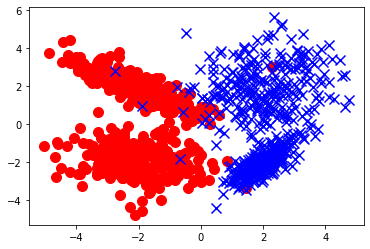

In [37]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)    # первый и второй признак для у = 0
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)    # первый и второй признак для у = 1
plt.show()

In [38]:
# градиентный спуск

class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, theta, theta_grad):   #один шаг градиентного спуска, аргумент - градиент функции ошибки
        return theta - self._alpha * theta_grad
    
    def optimize(self, X, y, start_theta, n_iters):   #  реализация всего алгоритма оптимизации методом градиентного спуска
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta

    def fit(self, X, y):     # метод обучения, который как раз и принимает на вход точки данных датасета:
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [39]:
class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))

    def grad_func(self, X, y, theta):  # метод grad_func(X, y, theta), то есть метод вычисления градиента (частных производных функции ошибки)
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad

    def predict_proba(self, X):  #  метод предсказания, выдает значения сигмоиды - вероятность отнесения данного объекта к полоительному классу:
        return self.sigmoid(X, self.theta)

    def predict(self, X):  # точное предсказание
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [40]:
logreg = LogReg()  # экземпляр класса модели

In [41]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])    # добавим фиктивный столбец единиц

In [42]:
logreg.fit(X, y)    # обучение 
y_pred = logreg.predict(X)   # предсказание

In [43]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

# метрики качества

accuracy = 0.98 F1-score = 0.98


In [44]:
y_pred_proba = logreg.predict_proba(X)   # значения вероятностей для каждого объекта

In [45]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
 

In [46]:
# создаем двумерную матрицу, содержащую все комбинации значений признаков в заданном диапазоне
# создаем равномерную сетку в прямоугольнике от минимального до максимального значения каждого признака (отступая для красоты 1 в обоих направлениях).

In [47]:
Z = logreg.predict_proba(XX)   
Z = Z.reshape(xx.shape)

# Данный код выполнит предсказание модели в каждой точке нашей сетки

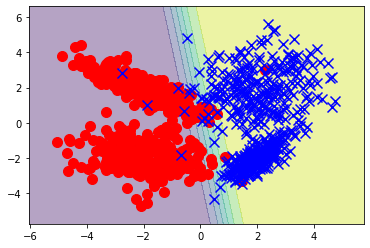

In [48]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [49]:
# то же самое, используя библиотечные фуекции
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)   # разделение данных на тестовые и обучющие


In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()   # экземпляр класса

In [51]:
model.fit(X_train, y_train)   # обучениe
y_pred_lr = model.predict(X_test)    # предсказание

Задания для самостоятельного выполнения
1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.
4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.
5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.
6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.
7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.


1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [52]:
y_pred_lr   # результаты обучения модели

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1])

In [53]:
pd.DataFrame(y_pred_lr).value_counts()

1    106
0     94
dtype: int64

In [54]:
model.coef_, model.intercept_    # коэфы и свободный член регрессии

(array([[-1.67170589e-06,  2.96827607e+00,  3.74188501e-01]]),
 array([-0.23082057]))

In [55]:
model.predict_proba(X)    # матрицa вероятностей того, что прогнозируемый результат равен нулю или единице

# Первый столбец — это вероятность того, что прогнозируемый результат будет равен нулю, то есть  
# Второй столбец — это вероятность того, что на выходе будет единица

array([[4.80590175e-03, 9.95194098e-01],
       [9.83107420e-01, 1.68925800e-02],
       [7.77561507e-01, 2.22438493e-01],
       ...,
       [2.13280811e-04, 9.99786719e-01],
       [9.96549683e-01, 3.45031669e-03],
       [9.95288804e-01, 4.71119634e-03]])

In [56]:
model.score(X,y)  # возвращает отношение количества правильных прогнозов к количеству наблюдений

0.976

In [57]:
from sklearn. metrics import classification_report
print(classification_report(y, model.predict(X)))    # олный отчет о классификации

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       499
           1       0.97      0.98      0.98       501

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [58]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_lr)   # метрика точности 
# правильно полож, неправильно полож
# неправильно отриц, правильно отриц

array([[ 92,   3],
       [  2, 103]])

<Axes: >

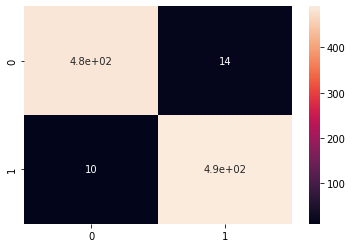

In [59]:
import seaborn as sns     # в графическом виде
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

<Axes: ylabel='Count'>

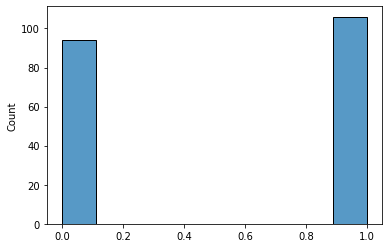

In [60]:
sns.histplot(y_pred_lr)

In [61]:
metrics.accuracy_score(y_test, y_pred_lr)   # точность модели

0.975

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [62]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

class SGD():
    def __init__(self, alpha=0.005, n_iters=1000):    # другое значение скорости обучения -- alpha
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta

    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))

    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred



In [63]:
logreg = LogReg()  # экземпляр класса модели

In [64]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])    # добавим фиктивный столбец единиц

In [65]:
logreg.fit(X, y)    # обучение 
y_pred = logreg.predict(X)   # предсказание

In [66]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

# метрики качества

accuracy = 0.96 F1-score = 0.96


In [67]:
y_pred_proba = logreg.predict_proba(X)   # значения вероятностей для каждого объекта

In [68]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
 

In [69]:
Z = logreg.predict_proba(XX)   
Z = Z.reshape(xx.shape)

# Данный код выполнит предсказание модели в каждой точке нашей сетки

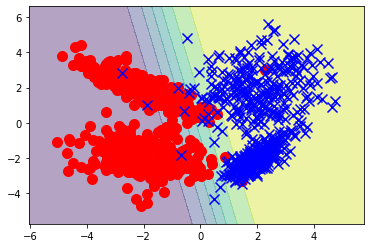

In [70]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [71]:
class SGD():
    def __init__(self, alpha=0.005, n_iters=1000):    # другое значение скорости обучения -- alpha
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta

    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])   ## добавление фиктивного столбца с 1
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [72]:
logreg = LogReg()  # экземпляр класса модели

In [73]:
X

array([[ 1.        ,  1.86341137,  0.08764555],
       [ 1.        , -1.53099717,  1.90118241],
       [ 1.        , -0.01722404, -2.59111159],
       ...,
       [ 1.        ,  2.33019532,  4.72180951],
       [ 1.        , -2.01084076,  1.42633933],
       [ 1.        , -2.00873243,  2.24540194]])

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

In [74]:
score = []
for i in range(1,101):
  X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=10*i,   #  указывает, должны ли различные классы быть более распределенными
                          random_state=1)
  
  X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)   # разделение данных на тестовые и обучющие

  model = LogisticRegression()   # экземпляр класса
  model.fit(X_train, y_train)   # обучениe
  y_pred_lr = model.predict(X_test)    # предсказание
  print(model.score(X,y))
  score.append(model.score(X,y))

0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997
0.997


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/l

In [75]:
pd.DataFrame({'class_sep':[10*i for i in range(1,101)], 'model.score': score})

,class_sep,model.score
0,10,0.997
1,20,0.997
2,30,0.997
3,40,0.997
4,50,0.997
...,...,...
95,960,0.997
96,970,0.997
97,980,0.997
98,990,0.997


In [76]:
# вывод: точность модели не зависит от параметра class_sep

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [143]:
X, y = make_classification(n_samples=1000,
                          n_features=30,
                          n_informative=30,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [144]:
X.shape

(1000, 30)

In [145]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [146]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

In [149]:
from sklearn.metrics import f1_score
ac = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
ac, f1

(0.935, 0.9406392694063928)

6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [156]:
X, y = make_classification(n_samples=10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=2,
                          random_state=1)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.6)
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = 'micro')
ac, f1

(0.9505, 0.9505)

7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [92]:
lr = LogisticRegression()

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr.fit(X_train, y_train)

pp = lr.predict_proba(X_test)[:, 1]

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pp)   # площадь под кривой рабочих характеристик приемника по результатам прогнозирования.

0.9919106317411401

Контрольные вопросы
Сформулируйте, в чем состоит задача классификации, придумайте несколько примеров.


In [ ]:
# задача классификации состоит в предсказании какого-то дискретного значения, в противоположность регрессии - предсказанию непрерывного значения.
#задача отнесения объекта по совокупности его характеристик к одному из заранее известных классов.

# примеры -- распознавание объектов на изображении, определение, является электронное письмо спамом или нет, распознавание объектов, 
# генерация текстов, подбор тематики текстов, идентификация объектов на изображениях, распознавание речи, машинный перевод и так далее

Что такое шаг градиентного спуска?

In [95]:
# небольшое число, на которое дополнительно умножают производную
# и которое,  может меняться от итерации к итерации, чтобы начение производной не было очень большим и 
# не «перескочить» через значение x* и уйдем далеко влево или вправо

Какая функция используется в качестве функции ошибки в модели логистической регрессии?

In [ ]:
# Если наш правильный ответ y равен 0, тогда функция стоимости будет равна 0, если наша функция гипотезы также выдает 0. Если наша гипотеза приближается к 1,
#  то функция стоимости будет приближаться к бесконечности.
# Если наш правильный ответ y равен 1, функция стоимости будет равна 0, если наша функция гипотезы выйдет 1. 
# Если наша гипотеза приближается к 0, то функция стоимости приблизится к бесконечности.


Зачем при реализации логистической регрессии к матрице признаков добавлялся столбец из единиц?